### TP 2 : Apprentissage Profond avec TensorFlow / Keras  

### Exercice 1 : Reconnaissance de chiffres manuscrits (MNIST)

In [10]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.20.0


In [12]:
# Question 1
#  TensorFlow est une bibliothèque bas niveau permettant de construire et exécuter des graphes de calculs.
# Keras est une interface haut niveau de TensorFlow qui simplifie la création et l'entraînement de réseaux de neurones.


#  Question 2
#  La couche Flatten transforme une image 2D (28x28) en un vecteur 1D (784 valeurs) pour l’entrée dans les couches denses.

#  Question 3
print("Version TensorFlow :", tf.__version__)

#  Question 4
# Sequential crée un modèle couche par couche.
# Dense crée une couche entièrement connectée entre les neurones.

Version TensorFlow : 2.20.0


### 2. Chargement et préparation du dataset 

In [15]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalisation
x_train = x_train / 255.0
x_test = x_test / 255.0

print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 44s 4us/step
x_train shape: (60000, 28, 28)
y_train shape: (60000,)


In [16]:
# Question 1 
#  La normalisation (division par 255) permet de ramener les valeurs des pixels entre 0 et 1
# pour améliorer la vitesse et la stabilité de l'apprentissage.

# Question 2
# Chaque image est de taille (28, 28) et de type uint8 avant normalisation, puis float32 après.
print("Taille d'une image :", x_train[0].shape)
print("Type de données :", x_train.dtype)

# Question 3
# Le jeu d'entraînement contient 60 000 exemples.
print("Nombre d'exemples d'entraînement :", x_train.shape[0])


Taille d'une image : (28, 28)
Type de données : float64
Nombre d'exemples d'entraînement : 60000


### 3. Visualisation d’échantillons 

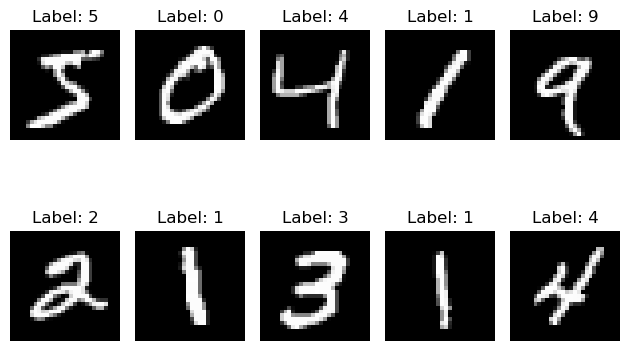

In [18]:
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(x_train[i], cmap='gray' )
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt. show()

In [19]:
#  Question 1
# plt.figure(figsize=(n, n)) ou la boucle range(n) permet de modifier le nombre d'images affichées.

# Question 2
#  cmap='gray' indique que l'image doit être affichée en niveaux de gris.

# Question 3
# Cette étape permet de vérifier la qualité et la cohérence des données avant l'apprentissage.


### 4. Construction du modèle de réseau de neurones

In [29]:
model = Sequential([
    Input(shape=(28, 28)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.summary()



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [31]:
#  Question 1
#Le modèle contient (28*28*128 + 128) + (128*10 + 10) = 100480 + 1290 = 101770 paramètres.

# Question 2
# La fonction d'activation de sortie est Softmax car elle renvoie une distribution de probabilités sur 10 classes.

#  Question 3
# ReLU active uniquement les valeurs positives → accélère l’apprentissage.
# Softmax transforme les valeurs en probabilités → utile pour la classification multiclasse.


### 5. Compilation du modèle 

In [34]:

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [36]:
#  Question 1
#  L’optimiseur ajuste les poids pour minimiser la fonction de perte.
# Question 2
#  La fonction de perte mesure l’écart entre les prédictions et les vraies valeurs.
#  Question 3
# Si on change la fonction de perte, le comportement d’apprentissage change aussi (certaines fonctions sont inadaptées).
#  Question 4
#  Un mauvais optimiseur peut ralentir ou empêcher la convergence.
#  Question 5
#"loss" mesure l’erreur du modèle, "metrics" mesure la performance (ex: accuracy).


### 6. Entraînement du modèle

In [39]:
history = model.fit(
x_train, y_train,
epochs=5,
batch_size=32,
validation_data=(x_test, y_test)

)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - accuracy: 0.9281 - loss: 0.2530 - val_accuracy: 0.9633 - val_loss: 0.1266
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9678 - loss: 0.1089 - val_accuracy: 0.9669 - val_loss: 0.1059
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9769 - loss: 0.0765 - val_accuracy: 0.9733 - val_loss: 0.0842
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9829 - loss: 0.0568 - val_accuracy: 0.9755 - val_loss: 0.0816
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9861 - loss: 0.0447 - val_accuracy: 0.9788 - val_loss: 0.0663


In [45]:
#  Question 1
#  Une époque correspond à un passage complet du modèle sur toutes les données d’entraînement.
#  Question 2
# Le jeu de validation évalue la performance du modèle sur des données non vues.
# Question 3
#  Augmenter à 50 époques peut améliorer la précision mais risque de causer un surapprentissage (overfitting).



### 7. Évaluation du modèle 

In [50]:
test_loss, test_acc = model. evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")
print(f"Test loss: {test_loss:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9788 - loss: 0.0663
Test accuracy: 0.9788
Test loss: 0.0663


In [52]:
# Exercice 1 - Question 1
# Interprétation : La précision finale est souvent autour de 97–98 % pour MNIST.
# Exercice 1 - Question 2
# Interprétation : La précision du test est souvent inférieure car le modèle n’a jamais vu ces données.
# Exercice 1 - Question 3
# Interprétation : En cas de surapprentissage, on peut utiliser Dropout, Data Augmentation ou EarlyStopping.


### 8. Visualisation des performances 

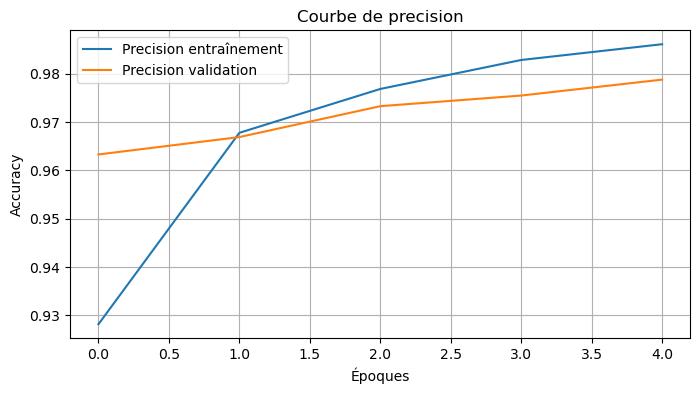

In [55]:
plt.figure(figsize=(8,4))
plt.plot(history.history['accuracy'], label='Precision entraînement' )
plt.plot(history.history['val_accuracy' ], label='Precision validation' )
plt.title('Courbe de precision' )
plt.xlabel('Époques' )
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [57]:
#  Question 1
#  Les deux courbes (accuracy et val_accuracy) montrent la progression du modèle.
# Question 2
# Le surapprentissage se détecte quand la courbe de validation diverge après un certain point.
# Question 3
#  Pour y remédier, on peut réduire les époques, ajouter du Dropout ou plus de données.
#  Question 4
#  Si les deux courbes divergent, le modèle ne généralise pas bien.


### 9. Prédictions et visualisation 

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


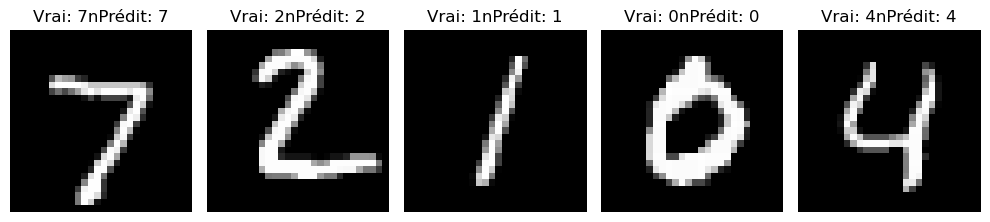

In [62]:
predictions = model.predict(x_test)

plt.figure(figsize=(10,4))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(x_test[i], cmap='gray' )
    plt.title(f"Vrai: {y_test[i]}nPrédit: {np.argmax(predictions[i])}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [64]:
# Exercice 1 - Question 1
# Interprétation : Le modèle peut faire quelques erreurs sur des chiffres difficiles à distinguer.

predictions = model.predict(x_test)
pred_labels = np.argmax(predictions, axis=1)

# Question 2
# Une prédiction erronée peut venir d’une image floue ou mal écrite.
# Question 3
# Pour améliorer la précision, on peut utiliser un CNN (réseau de neurones convolutif).


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


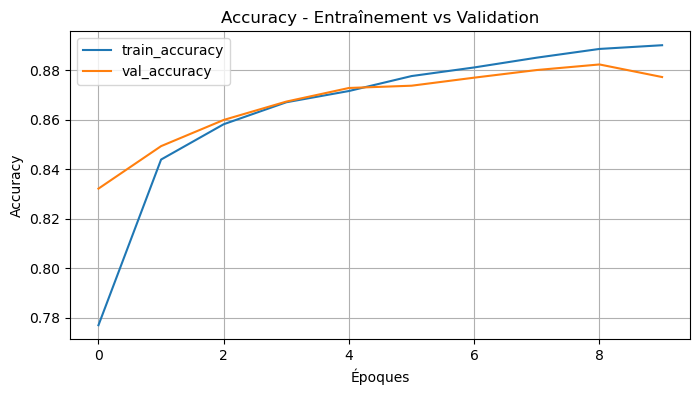

In [134]:
# Exercice 1 - Tracer accuracy & val_accuracy
plt.figure(figsize=(8,4))
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title("Accuracy - Entraînement vs Validation")
plt.xlabel("Époques")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()



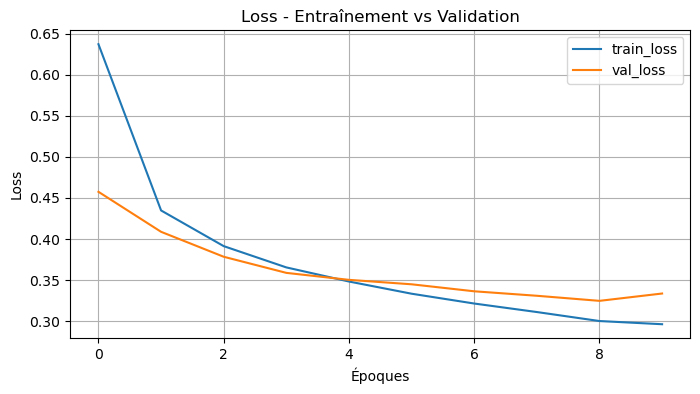

In [136]:
# Exercice 1 - Tracer loss & val_loss
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title("Loss - Entraînement vs Validation")
plt.xlabel("Époques")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

### Exercice 2 : classification d’images en utilisant le dataset Fashion MNIST 

In [83]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import seaborn as sns

# Pour la reproductibilité
tf.random.set_seed(42)

# Chargement du dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

### Étape 1 - Exploration du jeu de données



### A. Dimensions et types



In [87]:
print("Dimensions du train set :", X_train.shape)
print("Dimensions du test set :", X_test.shape)


Dimensions du train set : (60000, 28, 28)
Dimensions du test set : (10000, 28, 28)



### B. Visualisation d'exemples


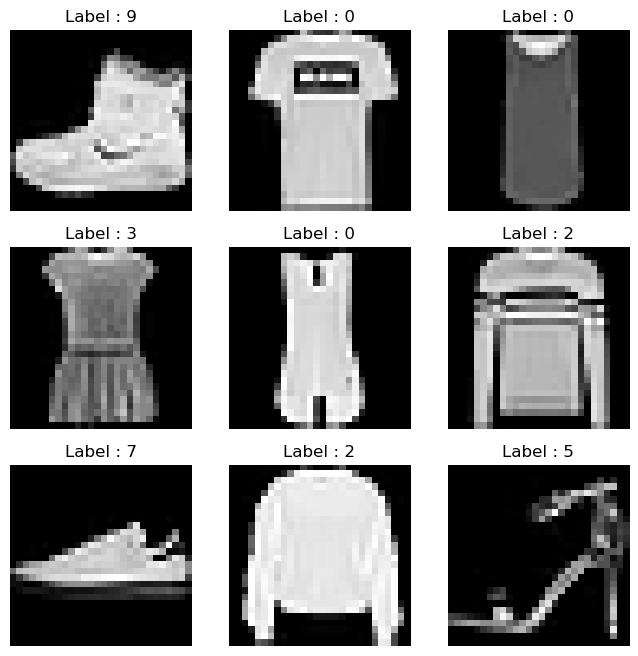

In [90]:

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
for i in range(9):
    plt.subplot(3, 3, i +1)
    plt.imshow(X_train[i], cmap='gray' )
    plt.title(f"Label : {y_train[i]}")
    plt.axis('off')
plt.show()

In [92]:
#Question 1
#Les données sont des images en niveaux de gris (28x28 pixels).
# Chaque image représente un vêtement appartenant à une des 10 classes.
print("Taille d'une image :", x_train[0].shape)
print("Type de données :", x_train.dtype)
print("Nombre d'exemples d'entraînement :", x_train.shape[0])


Taille d'une image : (28, 28)
Type de données : float64
Nombre d'exemples d'entraînement : 60000


### Étape 2 – Prétraitement des données 

In [95]:
from tensorflow.keras.utils import to_categorical

# Normalisation des pixels entre 0 et 1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Encodage one-hot des Labels
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)


In [97]:
# Question 1
# On normalise les images pour que les valeurs des pixels soient entre 0 et 1
# Cela accélère l'apprentissage et stabilise la descente de gradient.

#  Question 2
# Le one-hot encoding transforme les labels (0–9) en vecteurs binaires
# Il est essentiel pour la classification multiclasse afin que la sortie du réseau corresponde à chaque classe.





### Étape 3 - Création d'un modèle dense (ANN)


In [102]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout

model = Sequential([
Input(shape=(28, 28)),
Flatten(),
Dense(128, activation='relu'),
Dropout(0.2),
Dense(64, activation='relu'),
Dense(10, activation='softmax')])

model. summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.7770 - loss: 0.6371 - val_accuracy: 0.8322 - val_loss: 0.4574
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.8439 - loss: 0.4347 - val_accuracy: 0.8493 - val_loss: 0.4087
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.8582 - loss: 0.3912 - val_accuracy: 0.8599 - val_loss: 0.3783
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8671 - loss: 0.3653 - val_accuracy: 0.8673 - val_loss: 0.3587
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.8716 - loss: 0.3481 - val_accuracy: 0.8728 - val_loss: 0.3502
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.8776 - loss: 0.3333 - val_accuracy: 0.8737 - val_loss: 0.3448
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.8811 - loss: 0.3213 - val_accuracy: 0.8770 - val_loss: 0.3362
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.8851 - loss: 0.3110 - val_accur

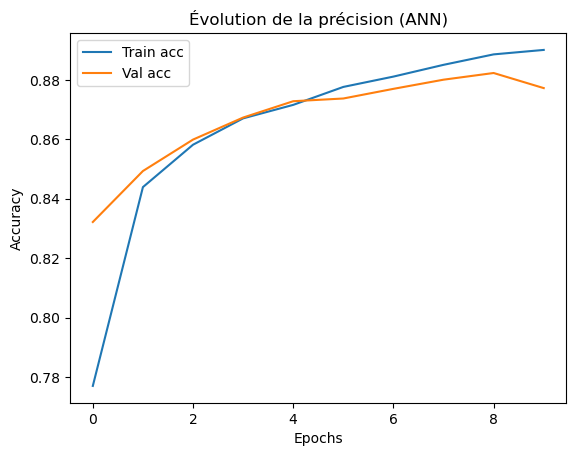

In [104]:
#Compilation et entraînement

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'])

history = model.fit(
    X_train, y_train_cat,
    epochs=10,
    batch_size=128,
    validation_split=0.2

)

#Visualisation

plt.plot(history.history['accuracy'], label='Train acc')
plt.plot(history.history['val_accuracy'], label='Val acc')
plt.legend()
plt.title('Évolution de la précision (ANN)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [106]:
#  Question 1
#ReLU est utilisée car elle évite le problème de gradient nul et accélère l'apprentissage.

# Question 2
#  accuracy = précision sur le jeu d'entraînement,
# val_accuracy = précision sur le jeu de validation, permettant de détecter le surapprentissage.

#  Question 3
# Si on augmente à 50 époques, le modèle peut surapprendre et la val_accuracy diminuer.


In [108]:
test_loss, test_acc = model.evaluate(X_test, y_test_cat)
print("Precision sur le test set :", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8684 - loss: 0.3623
Precision sur le test set : 0.868399977684021


### Étape 4 — Introduction aux Fonctions d’Activation 

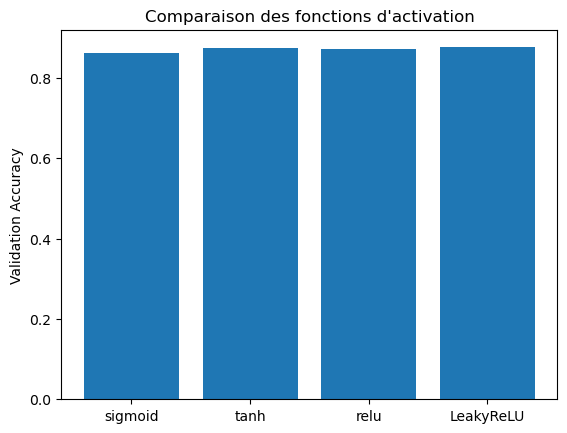

In [111]:
from tensorflow.keras.layers import LeakyReLU

activations = ['sigmoid', 'tanh', 'relu' ]
results = {}

for act in activations:
    model_act = Sequential([
        Input(shape=(28,28)),
        Flatten(),
        Dense(128, activation=act),
        Dense(64, activation=act),
        Dense(10, activation='softmax')
    
    ])
    
    model_act.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy' ])
    h = model_act.fit(X_train, y_train_cat, epochs=5, batch_size=128, validation_split=0.2, verbose=0)
    results[act] = h.history['val_accuracy' ][-1]

# Leaky ReLU
model_leaky = Sequential([
    Input(shape=(28,28)),
    Flatten(),
    Dense(128),
    LeakyReLU(0.1),
    Dense(64),
    LeakyReLU(0.1),
    Dense(10, activation='softmax')])

model_leaky.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy' ])
h = model_leaky.fit(X_train, y_train_cat, epochs=5, batch_size=128, validation_split=0.2, verbose=0)
results['LeakyReLU'] = h.history['val_accuracy' ][-1]

plt.bar(results.keys(), results.values())
plt.title("Comparaison des fonctions d'activation")
plt.ylabel("Validation Accuracy")
plt.show()


In [113]:
# Question 1
# ReLU donne généralement les meilleurs résultats car elle apprend plus vite
# et évite la saturation des gradients contrairement à sigmoid ou tanh.

#  Question 2
# Sigmoid et tanh sont moins utilisées dans les couches cachées
# car elles saturent pour de grandes valeurs et ralentissent l'apprentissage.

#  Question 3
# LeakyReLU corrige le problème des gradients nuls en laissant passer une petite pente
# pour les valeurs négatives.


### Étape 5 : Modèle CNN (Convolutional Neural Network) 

In [116]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D

# Reshape pour ajouter la dimension "canal"
X_train_cnn = X_train.reshape(-1, 28, 28, 1)
X_test_cnn = X_test.reshape(-1, 28, 28, 1)

cnn = Sequential([
    Input(shape=(28, 28,1)),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')])

cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy' ])
cnn.summary()


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [118]:
# Entraînement

history_cnn = cnn.fit(
    X_train_cnn, y_train_cat,
    epochs=10,
    batch_size=128,
    validation_split=0.2

)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 20s 41ms/step - accuracy: 0.7710 - loss: 0.6308 - val_accuracy: 0.8515 - val_loss: 0.4179
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 16s 42ms/step - accuracy: 0.8570 - loss: 0.3996 - val_accuracy: 0.8748 - val_loss: 0.3506
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 15s 41ms/step - accuracy: 0.8742 - loss: 0.3475 - val_accuracy: 0.8846 - val_loss: 0.3202
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 17s 44ms/step - accuracy: 0.8874 - loss: 0.3131 - val_accuracy: 0.8909 - val_loss: 0.2981
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 15s 41ms/step - accuracy: 0.8942 - loss: 0.2904 - val_accuracy: 0.8947 - val_loss: 0.2824
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 15s 41ms/step - accuracy: 0.9006 - loss: 0.2711 - val_accuracy: 0.8990 - val_loss: 0.2718
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 15s 41ms/step - accuracy: 0.9060 - loss: 0.2534 - val_accuracy: 0.9032 - val_loss: 0.2638
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 15s 41ms/step - accuracy: 0.9112 - loss: 0.2402 - 

In [120]:
test_loss, test_acc = cnn.evaluate(X_test_cnn, y_test_cat)
print("Precision CNN sur test set :", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9026 - loss: 0.2672
Precision CNN sur test set : 0.9025999903678894


In [121]:
#  Question 1
# Un ANN traite les données sous forme de vecteurs,
# alors qu’un CNN traite directement les images sous forme matricielle avec des filtres convolutionnels.

#  Question 2
#  Le CNN donne de meilleurs résultats car il extrait automatiquement
# les caractéristiques spatiales locales (bords, textures…).

# Question 3
#  Les couches de Pooling réduisent la taille des cartes de caractéristiques
# et limitent le surapprentissage en conservant les informations essentielles.


### Étape 6 — Visualisation des performances 

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


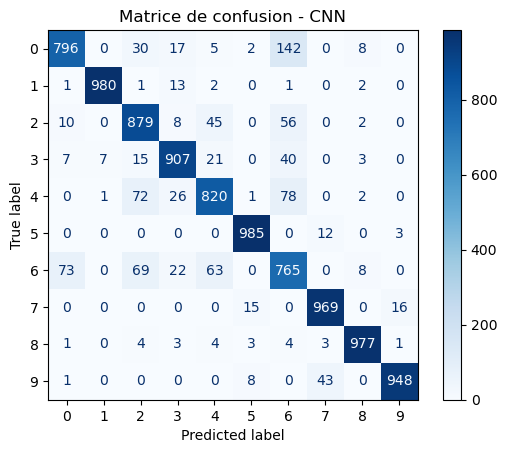

In [123]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

y_pred = np.argmax(cnn.predict(X_test_cnn), axis=1)
ConfusionMatrixDisplay. from_predictions(y_test, y_pred, cmap="Blues")
plt.title("Matrice de confusion - CNN")
plt.show()

In [126]:
#  Question 1
#  Les classes proches visuellement (ex : chemise vs t-shirt) sont souvent confondues.

# Question 2
# Pour réduire les erreurs, on peut augmenter la profondeur du CNN
# ou utiliser la Data Augmentation.


### Étape 7 : Data Augmentation 

In [130]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    horizontal_flip=True

)

datagen.fit(X_train_cnn)

cnn.fit(
    datagen.flow(X_train_cnn, y_train_cat, batch_size=128),
    epochs=10,
    validation_data=(X_test_cnn, y_test_cat)

)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 64s 132ms/step - accuracy: 0.8664 - loss: 0.3706 - val_accuracy: 0.9028 - val_loss: 0.2748
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 63s 134ms/step - accuracy: 0.8817 - loss: 0.3228 - val_accuracy: 0.8964 - val_loss: 0.2826
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 62s 133ms/step - accuracy: 0.8866 - loss: 0.3079 - val_accuracy: 0.9071 - val_loss: 0.2605
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 45s 96ms/step - accuracy: 0.8914 - loss: 0.2954 - val_accuracy: 0.9001 - val_loss: 0.2725
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 62s 133ms/step - accuracy: 0.8941 - loss: 0.2861 - val_accuracy: 0.9026 - val_loss: 0.2649
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 56s 119ms/step - accuracy: 0.8968 - loss: 0.2802 - val_accuracy: 0.9056 - val_loss: 0.2586
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 38s 80ms/step - accuracy: 0.8999 - loss: 0.2724 - val_accuracy: 0.9115 - val_loss: 0.2433
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 61s 130ms/step - accuracy: 0.9016 - loss: 0.2

In [132]:
#  Question 1
# La Data Augmentation augmente artificiellement la taille du dataset,
# ce qui aide le modèle à mieux généraliser et à éviter le surapprentissage.

#  Question 2
#  Les transformations les plus efficaces pour ce dataset sont la rotation légère
# et le décalage horizontal/vertical, car elles reproduisent les variations réelles des vêtements.
